<a href="https://colab.research.google.com/github/nemat-al/PracticalDL_fastai/blob/main/2_2_dogs_cats_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#|default_exp app

### Installing and Importing

In [1]:
pip install -Uqq fastai

In [2]:
 from fastai.vision.all import *

### Getting the dataset


External data
Helper functions to download the fastai datasets
:
To download any of the datasets or pretrained weights, simply run untar_data by passing any dataset name

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x):return x[0].isupper()

### Dataloaders

In [5]:
dls = ImageDataLoaders.from_name_func('.',
                                      get_image_files(path),
                                      valid_pct=0.2,
                                      seed=42,
                                      label_func=is_cat,
                                      item_tfms=Resize(192))

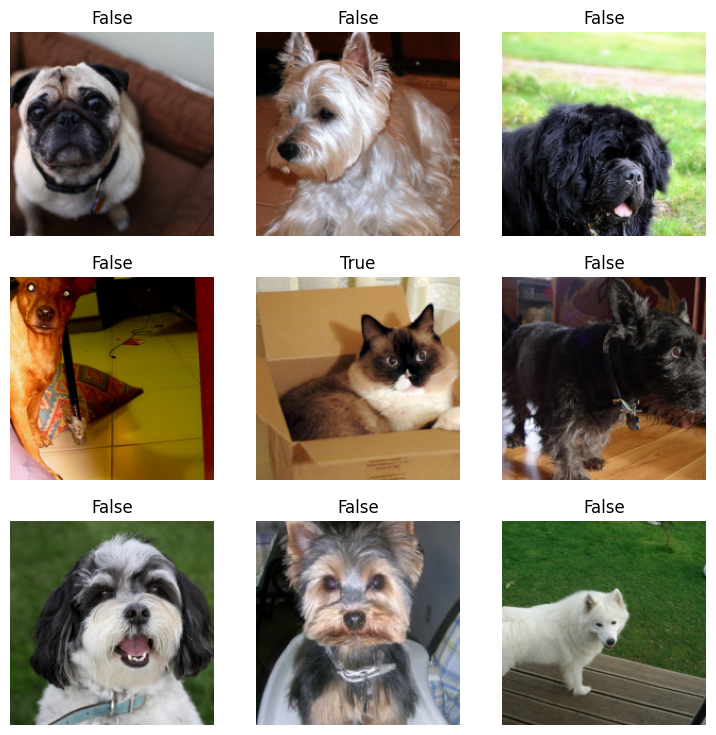

In [8]:
dls.show_batch()

### Training a resnet18

In [6]:
learner = vision_learner(dls,resnet18, metrics=error_rate)
learner.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.185766,0.049658,0.016915,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.069988,0.049987,0.014885,00:43
1,0.033820,0.030696,0.010825,00:44
2,0.020041,0.014788,0.006766,00:44


### Exporting model for production

In [7]:
learner.export('model.pkl')

### For Deployment

In [ ]:
#|export
import gardio as gr
from fastai.vision.all import *
def is_cat(x):return x[0].isupper()

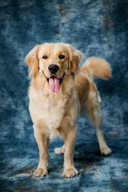

In [9]:
im = PILImage.create('/content/dog.jpg')
im.thumbnail((192,192))
im

#### Predicting

In [10]:
#|export
learn = load_learner('model.pkl')

In [11]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 6.8709e-07]))

Gardio require us to give it a function to call it for classification and return the labels as strings

In [12]:
 #|export
 categories = ('Dog','Cat')
 def classify_images(img):
  pred, idx, probs= learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [13]:
classify_images(im)

{'Dog': 0.9999992847442627, 'Cat': 6.870861284369312e-07}

#### For the interface in Gradio

In [ ]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'doggy.jpg']
intf = gr.Intergface(fn=classify_image, inputs=image,outputs=label,examples=examples)
intf.launch(inline=False)

### For exporint the notebook as .py file to be used in Gradio in HuggingFace Space

In [19]:
!pip install nbd_colab
from nbd_colab import *
from nbdev import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [28]:
#from nbdev.export import notebook2script
export.nb_export('/content/drive/MyDrive/Colab Notebooks/fastai/2.2 dogs_cats_training.ipynb','app.py')